Output image saved to: drive/My Drive/ColabNotebooks/Contour_Detection/output_image.jpg


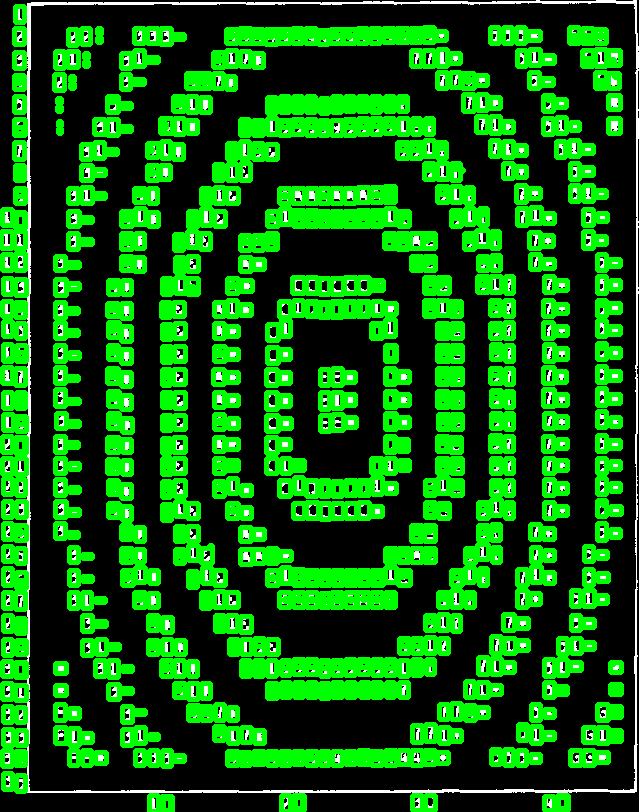

In [29]:

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image using a relative file path
image_path = 'drive/My Drive/ColabNotebooks/Contour_Detection/fig1.jpg'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to get a binary image with inverted colors
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image, including internal contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour of the external rectangular box
external_rect_contour = None
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w == image.shape[1] and h == image.shape[0]:
        external_rect_contour = contour
        break

# Remove the contour of the external rectangular box
if external_rect_contour is not None:
    contours.remove(external_rect_contour)

# Filter out contours that are too large to exclude external objects
filtered_contours = [contour for contour in contours if cv2.contourArea(contour) < 0.9 * image.shape[0] * image.shape[1]]

# Create a copy of the thresholded image
result = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)

# Draw bounding rectangles around remaining contours in green and invert colors within the bounding boxes
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 3) # BBox thickness = 3
    thresh[y:y+h, x:x+w] = 255 - thresh[y:y+h, x:x+w]

# Save the output image using a relative file path
output_image_path = 'drive/My Drive/ColabNotebooks/Contour_Detection/output_image.jpg'
cv2.imwrite(output_image_path, result)

# Display the saved image path
print("Output image saved to:", output_image_path)

# Display the result
cv2_imshow(result)
